In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import rebound
import matplotlib.pyplot as plt
import numpy as np
import vanillaWH_bruteforce
import integrator_tools

%matplotlib inline

# configuring plots
#plt.rc('text', usetex=True)            # use LaTeX for text
plt.rc('font', family='serif')          # use serif font
plt.rcParams.update({'font.size': 14})  # increase font size

In [3]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
#p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
#p1 = np.array([-2., 0., 0., 0., -0.7, 0., 2.])
#p2 = np.array([0., 60., 0.01, -0.095, 0., 0.01, 0.9])

p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
p1 = np.array([1., 0., 0., 0., 1., 0., 1e-9])
p2 = np.array([2., 0., 0., 0., 0.7, 0., 1e-9])

sim_jacobi = np.stack([p0, p1, p2])
masses = sim_jacobi[:,-1]

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

#timestep = 1./30. * P_1195
timestep = 1e-3
N_steps = 10000

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    # drift
    sim_jacobi = vanillaWH_bruteforce.drift(sim_jacobi, sim, h=timestep)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    #orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

time to integrate = 1.2 s


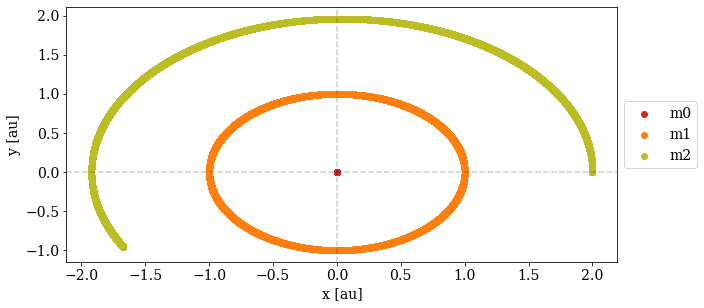

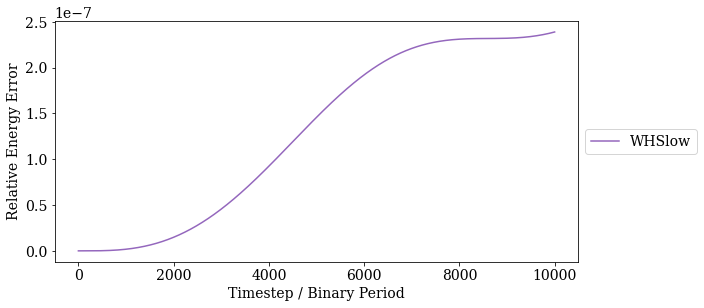

In [4]:
plt.figure(figsize=(10,4.5))
plt.scatter(orbit_soln[0,0], orbit_soln[0,1], label='m0', c='tab:red')
plt.scatter(orbit_soln[1,0], orbit_soln[1,1], label='m1', c='tab:orange')
plt.scatter(orbit_soln[2,0], orbit_soln[2,1], label='m2', c='tab:olive')

plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
#plt.axis('scaled')
#plt.xlim(-50,50)
#plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(energy_error, label='WHSlow', c='tab:purple')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('Timestep / Binary Period')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()
